<h1>Data Science Regression Project: Predicting Home Price in Banglore

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [ ]:
# prompt: import neceassary libraries to do data  loading, preprocessing, modeling in linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12,6)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


##Data Load: Load banglore home prices into a dataframe</h2>

In [ ]:
# prompt: import dataset to df from csv file
df1 = pd.read_csv('bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape

(13320, 9)

##Data Cleaning: Handle null values

In [ ]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

Since the null records from important columns ["location","size","bath"]  are insignificant compared to 13K records we can safely drop those

In [ ]:
df2=df1.dropna(subset=["location","size",'price','total_sqft',"bath"],axis="rows")
print(df2.isnull().sum())
print(df2.shape)

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath               0
balcony          536
price              0
dtype: int64
(13246, 9)


##Feature Engineering: formating Size,totla_sqft columns

###Feature Engineering: formating size

In [ ]:
df2["size"].describe()

count     13246
unique       31
top       2 BHK
freq       5198
Name: size, dtype: object

In [ ]:
df2["bhk"]=df2['size'].apply(lambda x: int(x.split(" ")[0]))
df3=df2.drop("size",axis="columns")


<ipython-input-196-7fa3ca3d8ce8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["bhk"]=df2['size'].apply(lambda x: int(x.split(" ")[0]))


In [ ]:
df3.head()

,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,NaN,1200,2.0,1.0,51.00,2


###Feature Engineering: formating total_sqft

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13246 non-null  object 
 1   availability  13246 non-null  object 
 2   location      13246 non-null  object 
 3   society       7747 non-null   object 
 4   total_sqft    13246 non-null  object 
 5   bath          13246 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         13246 non-null  float64
 8   bhk           13246 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 1.0+ MB


We need to convert total sqft value to numeric from string format.  
by careful observations some of the total_sqft records is in the odd form of :  
4125Perch  
1115 - 1130  
1100Sq. Yards  
361.33Sq. Yards  
3Cents  
1100 - 1225  
1100Sq. Meter  
we need to modify these records.

In [ ]:
def is_number(x):
    '''
    This function checks if the input x can be converted to a float.
    If the conversion is successful, it returns True, indicating that x is a number.
    If there's a ValueError during the conversion, it returns False, indicating that x is not a number.
    '''
    try:
        float(x)
    except ValueError:
        return False
    return True

df3[~df3.total_sqft.apply(is_number)].head(10)


,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,LedorSa,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,SNontle,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,Vaarech,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,Kinuerg,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,MCvarar,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Ready To Move,Kengeri,NaN,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,18-Sep,Hennur Road,Shxorm,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Ready To Move,Arekere,NaN,4125Perch,9.0,NaN,265.000,9
661,Super built-up Area,Ready To Move,Yelahanka,Rarthne,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,18-Mar,Bettahalsoor,Toainnt,3090 - 5002,4.0,0.0,445.000,4


the range of numbers (like, 2100-2850) can be transformed to its avg value.  
and the rest of the foreign units like SqMtrs, Perch etc records can be dropped from the table if their number of records is insignificant.

In [ ]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)
print(df4.shape)

(13200, 9)


##feature engineering: add new feature called price_per_sqft  and sqft_per_bhk to better inspect the data

In [ ]:
df5=df4.copy()
df5["price_per_sqft"]=df5.price*100000/df5.total_sqft
df5["sqft_per_bhk"]=df5.total_sqft/df4.bhk
print(df5.shape)
df5.head(3)



(13200, 11)


,area_type,availability,location,society,total_sqft,bath,balcony,price,bhk,price_per_sqft,sqft_per_bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,Coomee,1056.0,2.0,1.0,39.07,2,3699.810606,528.0
1,Plot Area,Ready To Move,Chikka Tirupathi,Theanmp,2600.0,5.0,3.0,120.00,4,4615.384615,650.0
2,Built-up Area,Ready To Move,Uttarahalli,NaN,1440.0,2.0,3.0,62.00,3,4305.555556,480.0


##Identify columns that are not predictors to build our model and drop them.

###corelation matrix

<ipython-input-202-735cf28b4b0e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df4.corr()


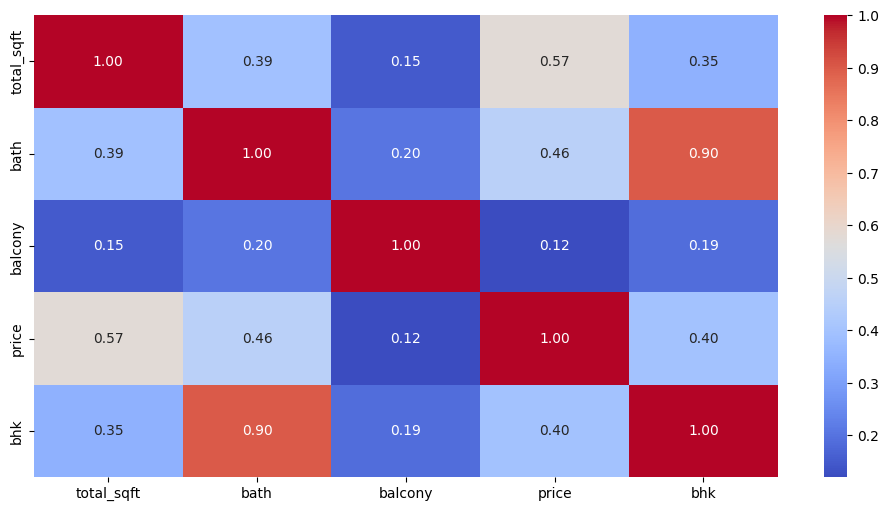

In [ ]:
corr_matrix=df4.corr()

# Plot a heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


observations:  
1. 'price' does not depend on -> 1.'balcony'; 2.'Price_per_sqft'.  
2. 'bath' and 'bhk' shows almost equal corelation with price.  
3. 'bath' and 'bhk' shows highest corelation with each other which violates
    "No Multi coliniarity assumptuon".
    so it is best to drop any one of the column.

### analyzing "society" an "location" feature

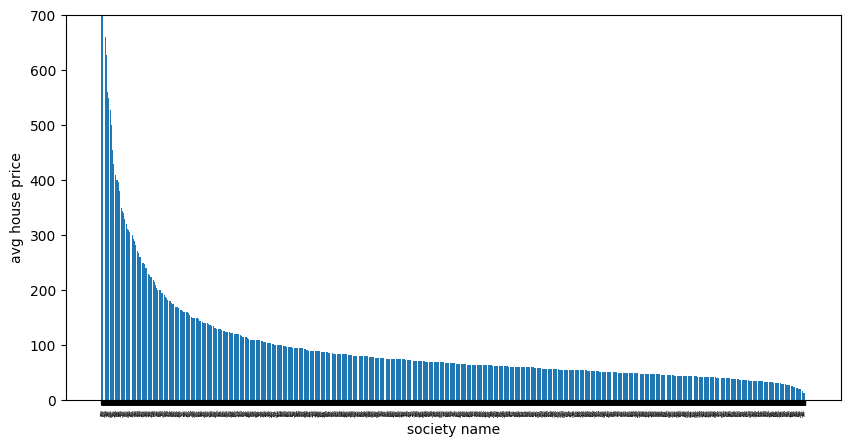

In [ ]:
# Group by 'society' and calculate the median price for each group
grouped_society=df1.groupby("society").price.median().reset_index().sort_values(by="price", ascending=False)

# Plotting the median prices
plt.figure(figsize=(10,5))
plt.bar(grouped_society["society"],grouped_society["price"])
plt.xlabel("society name")
plt.ylabel("avg house price")
plt.xticks(rotation='vertical',fontsize=1)
plt.ylim(0, 700)
plt.show()

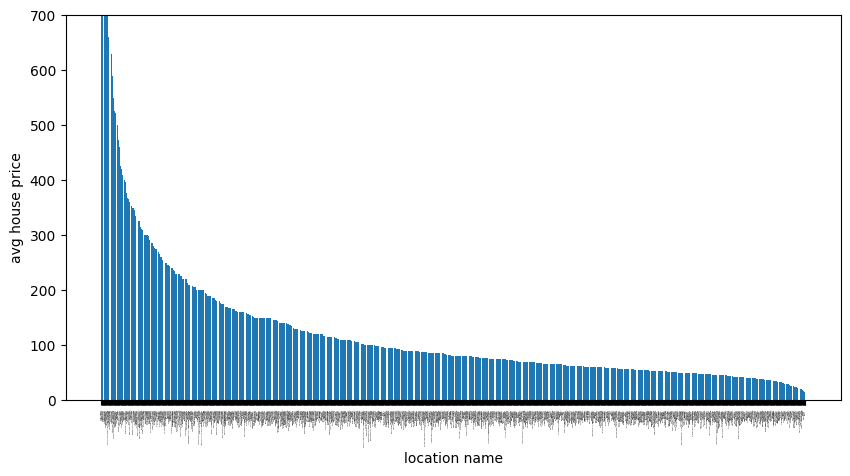

In [ ]:
# Group by 'society' and calculate the median price for each group
grouped_society=df1.groupby("location").price.median().reset_index().sort_values(by="price", ascending=False)

# Plotting the median prices
plt.figure(figsize=(10,5))
plt.bar(grouped_society["location"],grouped_society["price"])
plt.xlabel("location name")
plt.ylabel("avg house price")
plt.xticks(rotation='vertical',fontsize=1)
plt.ylim(0, 700)
plt.show()

by obeserving above two bar plots i.e.   
1.society vs avg.price  
2.location vs avg.prve  
as society and location both depicts a place, we can observe both show same trend in price prediction. so we can drop either of the columns. but since the location data is priority than society data, we drop society and keep location data.

##Dropping irrelevant columns from dataset

In [ ]:
df6=df5.drop(['availability','society','balcony',"bath"],axis="columns")
print(df6.shape)
df6.head()



(13200, 7)


,area_type,location,total_sqft,price,bhk,price_per_sqft,sqft_per_bhk
0,Super built-up Area,Electronic City Phase II,1056.0,39.07,2,3699.810606,528.0
1,Plot Area,Chikka Tirupathi,2600.0,120.00,4,4615.384615,650.0
2,Built-up Area,Uttarahalli,1440.0,62.00,3,4305.555556,480.0
3,Super built-up Area,Lingadheeranahalli,1521.0,95.00,3,6245.890861,507.0
4,Super built-up Area,Kothanur,1200.0,51.00,2,4250.000000,600.0


## Dimensionality Reduction: of "location" column

In [ ]:
# plot location wise average price per sqft in descining order using bar graph
df6.location = df6.location.apply(lambda x: x.strip())
grouped_location=df6.groupby("location").location.count().sort_values(ascending=False)
grouped_location.count()

1287

In [ ]:
grouped_location[grouped_location<10].count()

1033

there are majority of location data with less than 10 records per loction. we can label all such small data points as "other_location"

In [ ]:
otherlocThreshold=10
other_loc_names=grouped_location[grouped_location<10]
df7=df6.copy()
df7.location=df7.location.apply(lambda x: "other_location" if x in other_loc_names else x)
df7[df7.location=="other_location"].shape

(2732, 7)

##Outlier Removal using Domain knowledge

In [ ]:
index_outilers_low_sqft_per_bhk=np.array(df7[(df7.sqft_per_bhk < 300)].index.values)
df7[(df7.sqft_per_bhk < 300)].head(3)

,area_type,location,total_sqft,price,bhk,price_per_sqft,sqft_per_bhk
9,Plot Area,other_location,1020.0,370.0,6,36274.509804,170.0
45,Plot Area,HSR Layout,600.0,200.0,8,33333.333333,75.0
58,Plot Area,Murugeshpalya,1407.0,150.0,6,10660.980810,234.5


In [ ]:
index_outilers_high_sqft_per_bhk=np.array(df7[(df7.sqft_per_bhk > 2000) &(df7.area_type!="Plot  Area")].index.values)
df7[(df7.sqft_per_bhk > 2000) &(df7.area_type!="Plot  Area")].head(3)


,area_type,location,total_sqft,price,bhk,price_per_sqft,sqft_per_bhk
674,Built-up Area,Yelahanka,35000.0,130.0,3,371.428571,11666.666667
1370,Super built-up Area,Amruthahalli,4400.0,475.0,2,10795.454545,2200.000000
3539,Built-up Area,Kundalahalli,2400.0,650.0,1,27083.333333,2400.000000


In [ ]:
index_outilers_low_land_price=np.array(df7[(df7.sqft_per_bhk > 3000) &(df7.area_type=="Plot  Area")&(df7.price_per_sqft<5000)].index.values)
df7[(df7.sqft_per_bhk > 3000) &(df7.area_type=="Plot  Area")&(df7.price_per_sqft<5000)].head(3)

,area_type,location,total_sqft,price,bhk,price_per_sqft,sqft_per_bhk
1894,Plot Area,other_location,52272.0,140.0,3,267.829813,17424.000000
7242,Plot Area,Yelahanka,26136.0,150.0,1,573.921028,26136.000000
7947,Plot Area,JP Nagar,20000.0,175.0,3,875.000000,6666.666667


In [ ]:
# Combine all indices to be removed
all_indices_to_remove = np.unique(np.concatenate([index_outilers_low_sqft_per_bhk, index_outilers_high_sqft_per_bhk, index_outilers_low_land_price]))


In [ ]:
# using a threshold value of 300 sqft per bhk , we removed all those outliers with least but having many bedrooms.
df8=df7.drop(all_indices_to_remove)
print(df7.shape)
print(df8.shape)

(13200, 7)
(12436, 7)


## Outlier Removal Using Standard Deviation and Mean

In [ ]:
df8.price_per_sqft.describe()

count     12436.000000
mean       6307.330010
std        4154.979986
min         500.000000
25%        4211.233729
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove price_per_sqft outliers which are far of mean with +-1sd away for each location.

In [ ]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key, df_ in df.groupby("location"):
    m=df_.price_per_sqft.mean()
    sd=np.std(df_.price_per_sqft,ddof=0)
    df_slice=df_[(df_.price_per_sqft>m-sd) & (df_.price_per_sqft<=m+sd)]
    df_out=pd.concat([df_out,df_slice],ignore_index=True)
  return df_out

df9 = remove_pps_outliers(df8)
df9.shape

(10201, 7)

In [ ]:
df9.price_per_sqft.describe()

count    10201.000000
mean      5667.056457
std       2290.770871
min       1250.000000
25%       4250.000000
50%       5176.507658
75%       6428.571429
max      24509.803922
Name: price_per_sqft, dtype: float64

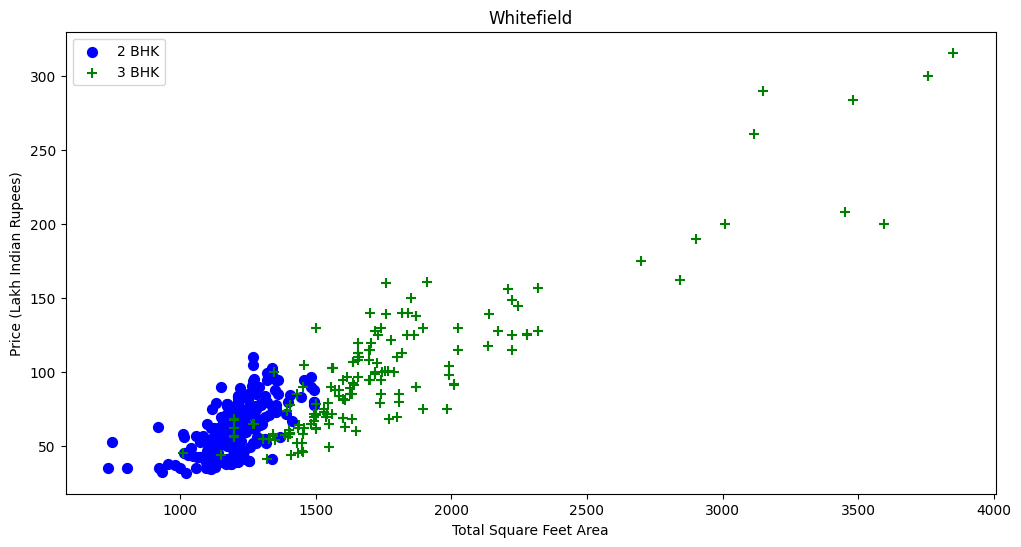

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (12,6)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df9,"Whitefield")

In [ ]:
def remove_bhk_outliers(df):
  # it check for min count of 5 records for previous bhk's,
  # even if prev bhk doesnt exist it looks for further below bhk value and fixes the threshold.
  excluded_indices=[]
  bhk_stats=df.groupby(["location","bhk"]).price_per_sqft.agg(["mean","count"]).reset_index()
  grouped_df=df.groupby(["location","bhk"])
  for (location,bhk), df_ in grouped_df:
    if(bhk>1):
      threshold=bhk_stats[(bhk_stats.location==location)&(bhk_stats.bhk<bhk)&(bhk_stats["count"]>5)]["mean"].max()
      curr_excluded_indices=df_[df_.price_per_sqft < threshold].index.values
      excluded_indices=np.append(excluded_indices,curr_excluded_indices)
  return df.drop(excluded_indices)

df10=remove_bhk_outliers(df9)
df10.shape

(7214, 7)

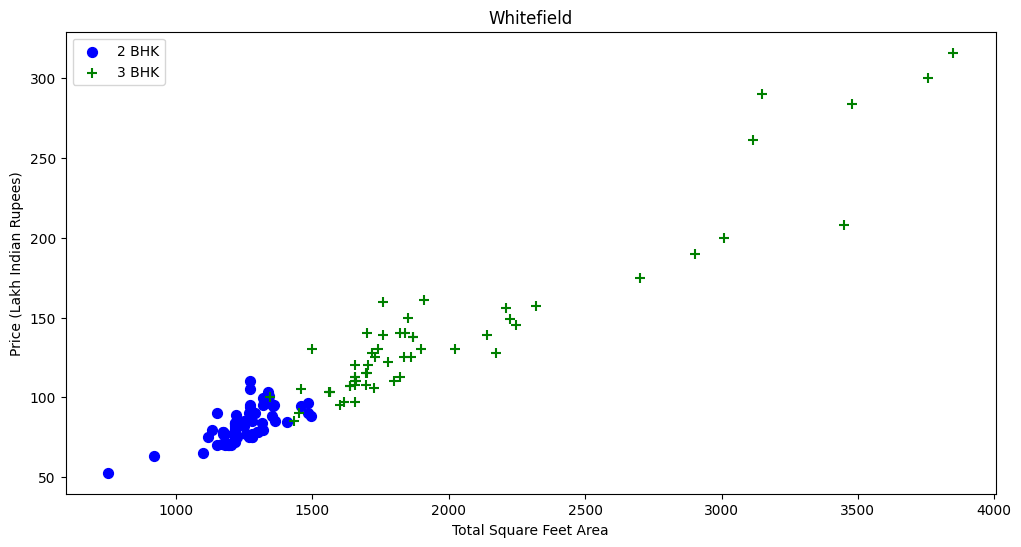

In [ ]:
plot_scatter_chart(df10,"Whitefield")

## Dropping no use columns

In [ ]:
df11=df10

In [ ]:
df12=df11.drop(["price_per_sqft","sqft_per_bhk","area_type"],axis="columns")

## OneHotEncoding : on "location" column

In [ ]:
len(df12.location.unique())

255

In [ ]:
dummies_location=pd.get_dummies(df12.location).drop("other_location",axis="columns")
len(dummies_location.columns)

254

In [ ]:
df13=pd.concat([df12,dummies_location],axis="columns").drop("location",axis="columns")
df13.head(2)

,total_sqft,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,428.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,194.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model building

In [ ]:
df13.shape

(7214, 257)

In [ ]:
X=df13.drop("price",axis=1)
X.head(2)

,total_sqft,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df13.price
y.head(2)

0    428.0
1    194.0
Name: price, dtype: float64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
# using sklearn library
from sklearn.linear_model import LinearRegression
lr_model_sklearn = LinearRegression()
lr_model_sklearn.fit(X_train,y_train)
print(f'R-squared value on the test set: {lr_model_sklearn.score(X_test,y_test)}')


R-squared value on the test set: 0.8730775333123741


In [ ]:
# using Stats Model library
import statsmodels.api as sm

# Assuming X_train is a DataFrame with the independent variables
# and y_train is a Series with the dependent variable
X_train_with_intercept = sm.add_constant(X_train)

# Create an OLS model and fit it to the training data
ols_model = sm.OLS(y_train, X_train_with_intercept).fit()

# Make predictions on the test set (assuming X_test is your test set)
X_test_with_intercept = sm.add_constant(X_test)

y_pred = ols_model.predict(X_test_with_intercept)

# Calculate R-squared on the test set
r_squared = 1 - ((y_test - y_pred) ** 2).sum() / ((y_test - y_test.mean()) ** 2).sum()

print(f'R-squared value on the test set: {r_squared}')

R-squared value on the test set: 0.8730775333123246


### StatsModel.Summary() statistics

In [ ]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     158.9
Date:                Fri, 15 Dec 2023   Prob (F-statistic):               0.00
Time:                        10:30:13   Log-Likelihood:                -28392.
No. Observations:                5771   AIC:                         5.730e+04
Df Residuals:                    5514   BIC:                         5.901e+04
Df Model:                         256                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -13.1727      1.908     -6.902      0.000     -16.914      -9.431
total_sqft                      0.0865      0.001    108.787      0.000       0.085       0.088
bhk                             2.5541      0.754      3.388      0.001       1.076       4.032
1st Block Jayanagar            79.3286     16.992      4.669      0.000      46.017     112.640
1st Block Koramangala           5.6509     24.002      0.235      0.814     -41.402      52.703
1st Phase JP Nagar              8.0059      9.136      0.876      0.381      -9.905      25.917
2nd Phase Judicial Layout     -60.2943     15.207     -3.965      0.000     -90.106     -30.482
2nd Stage Nagarbhavi          146.5643     15.278      9.593      0.000     116.614     176.515
5th Block Hbr Layout          -64.8397     16.994     -3.815      0.000     -98.155     -31.524
5th Phase JP Nagar            -33.2777      8.081     -4.118      0.000     -49.120     -17.435
6th Phase JP Nagar             -9.6950     10.783     -0.899      0.369     -30.834      11.444
7th Phase JP Nagar            -18.2627      4.160     -4.390      0.000     -26.418     -10.108
8th Phase JP Nagar            -45.4357      6.105     -7.442      0.000     -57.405     -33.467
9th Phase JP Nagar            -45.2614      7.323     -6.181      0.000     -59.617     -30.906
AECS Layout                   -30.4437     15.211     -2.001      0.045     -60.263      -0.625
Abbigere                      -41.4274      9.860     -4.202      0.000     -60.756     -22.098
Akshaya Nagar                 -43.8024      5.550     -7.892      0.000     -54.683     -32.922
Ambalipura                    -25.8253      9.476     -2.725      0.006     -44.403      -7.248
Ambedkar Nagar                -32.3628      7.322     -4.420      0.000     -46.718     -18.008
Amruthahalli                  -32.2908      8.308     -3.887      0.000     -48.577     -16.005
Anandapura                    -42.3010      8.834     -4.789      0.000     -59.619     -24.983
Ananth Nagar                  -40.5685      8.090     -5.015      0.000     -56.427     -24.710
Anekal                        -33.8196      8.841     -3.825      0.000     -51.152     -16.488
Anjanapura                    -44.7443     12.044     -3.715      0.000     -68.356     -21.133
Ardendale                     -47.5411      8.080     -5.884      0.000     -63.380     -31.702
Arekere                       -39.5966     13.889     -2.851      0.004     -66.825     -12.368
Attibele                      -31.6615      7.037     -4.499      0.000     -45.457     -17.866
BEML Layout                    -8.3177     15.206     -0.547      0.584     -38.127      21.492
BTM 1st Stage                  93.2417     19.643      4.747      0.000      54.733     131.750
BTM 2nd Sta

###Use K Fold Cross Validation to measure accuracy of our LinearRegression model</h2>

In [246]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=4)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85253117, 0.85854638, 0.86984025, 0.85225729, 0.89286986])

Conclusion:  
The cross-validation results with an average score of 0.85+ indicate that our model demonstrates good generalization performance. This suggests that the model is robust and capable of making accurate predictions on new, unseen data. However, it's important to consider other evaluation metrics and potential areas for improvement in future iterations of the model.

## predicting price for given custom input.

In [ ]:
X.head(1)

,total_sqft,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def predict_price(Total_sqft,bhk,location):
  location_name=(X.columns.values)[3:]
  X_input_p1=np.array([Total_sqft,bhk])
  index=np.where(location_name==location)[0][0]
  X_input_p2=np.zeros(index)
  X_input_p3=np.array([1])
  X_input_p4=np.zeros(254-index-1)
  X_input = np.concatenate([X_input_p1, X_input_p2, X_input_p3, X_input_p4])
  X_input_df = pd.DataFrame([X_input], columns=X_train.columns)
  price=lr_model_sklearn.predict(X_input_df)
  print(f"expected price of the property is : {round(price[0],2)} Lakh Rupees")

In [ ]:
price=predict_price(4000,5,"Whitefield")

expected price of the property is : 310.15 Lakh Rupees


In [ ]:
price=predict_price(4000,4,"Whitefield")

expected price of the property is : 307.59 Lakh Rupees


In [ ]:
price=predict_price(3500,4,"Whitefield")

expected price of the property is : 264.32 Lakh Rupees


In [ ]:
price=predict_price(2000,3,"Whitefield")

expected price of the property is : 131.97 Lakh Rupees


In [ ]:
price=predict_price(1500,2,"Whitefield")

expected price of the property is : 86.15 Lakh Rupees


In [ ]:
price=predict_price(1500,2,"Kaggalipura")

expected price of the property is : 73.71 Lakh Rupees


In [ ]:
price=predict_price(1500,2,"Yeshwanthpur")

expected price of the property is : 72.4 Lakh Rupees


Conclusion:  
the price estimation looks decent and reasonably extimating according to no of bedrooms and mostly due to total_area which is understandable. because, in the end maximum build area matters the most. and no of rooms are secondary.

## using Grid search cv to find best possible model

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridsearchcv(X, Y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [ ]:
find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.847504,{'fit_intercept': True}
1,lasso,0.710705,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.763092,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Conclusion:  
hence the highest score we got is from using Linear regression model.  
hence, Linera regression model is the best fit model for our data

## Export the Tested model to a pickle file

In [247]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_model_sklearn,f)

## exporting column names list to a file which will be useful for  next step implementation  of user interface for out model.

In [248]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("X_columns.json","w") as f:
    f.write(json.dumps(columns))